In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("Backtesting/Strat_dataframes/ppo_MSFT_15m_v1_run1.csv")  

In [4]:
display(df)

,Date,market_value,balance,stock_owned,price,action,amount
0,2024-11-25 09:30:00,100000.000000,100000.000000,0,420.269989,buy,0
1,2024-11-25 09:45:00,100000.000000,100000.000000,0,416.519989,buy,0
2,2024-11-25 10:00:00,100000.000000,100000.000000,0,415.309998,buy,0
3,2024-11-25 10:15:00,100000.000000,100000.000000,0,415.690002,buy,0
4,2024-11-25 10:30:00,100000.000000,100000.000000,0,416.609985,buy,0
...,...,...,...,...,...,...,...
477,2024-12-20 14:45:00,98842.566309,303.813562,225,437.950012,sell,0
478,2024-12-20 15:00:00,98663.688287,303.813562,225,437.154999,sell,0
479,2024-12-20 15:15:00,98579.313287,303.813562,225,436.779999,sell,0
480,2024-12-20 15:30:00,98460.063562,303.813562,225,436.250000,buy,0


In [7]:
display(df[df["amount"] > 0])

,Date,market_value,balance,stock_owned,price,action,amount
65,2024-11-27 12:45:00,99829.424229,66383.194615,79,423.369995,buy,79
88,2024-11-29 12:00:00,99787.364601,50620.763893,116,423.850006,buy,37
121,2024-12-03 10:15:00,100413.116465,41120.035960,138,429.660004,buy,22
213,2024-12-06 13:45:00,102023.244245,102023.244245,0,443.589905,sell,138
279,2024-12-11 10:45:00,101821.984372,62359.264157,88,448.440002,buy,88
288,2024-12-11 13:00:00,101779.324131,44760.133976,127,448.970001,buy,39
302,2024-12-12 10:00:00,101911.407277,8914.314137,206,451.442200,buy,79
355,2024-12-16 10:15:00,100853.468958,5324.941310,214,446.394989,buy,8
384,2024-12-17 11:00:00,102487.562189,303.813562,225,454.149994,buy,11


In [5]:
def render_all(render_df):
    df = render_df.set_index('Date')       
    fig, ax = plt.subplots(figsize=(18, 6)) 
    df.plot( y="market_value" , use_index=True,  ax = ax, style='--' , color='lightgrey') 
    df.plot( y="price" , use_index=True,  ax = ax , secondary_y = True , color='black')
         
    for idx in df.index.tolist():
        if (df.loc[idx]['action'] == 'buy') & (df.loc[idx]['amount'] > 0):
            plt.plot(
                idx,
                df.loc[idx]["price"] - 1,
                'g^'
            )
            plt.text(idx, df.loc[idx]["price"]- 3, df.loc[idx]['amount'] , c= 'green',fontsize=8, horizontalalignment='center', verticalalignment='center')
        elif (df.loc[idx]['action'] == 'sell') & (df.loc[idx]['amount'] > 0):
            plt.plot(
                idx,
                df.loc[idx]["price"] + 1,
                'rv'
                )
            plt.text(idx, df.loc[idx]["price"] + 3, df.loc[idx]['amount'], c= 'red',fontsize=8, horizontalalignment='center', verticalalignment='center')        


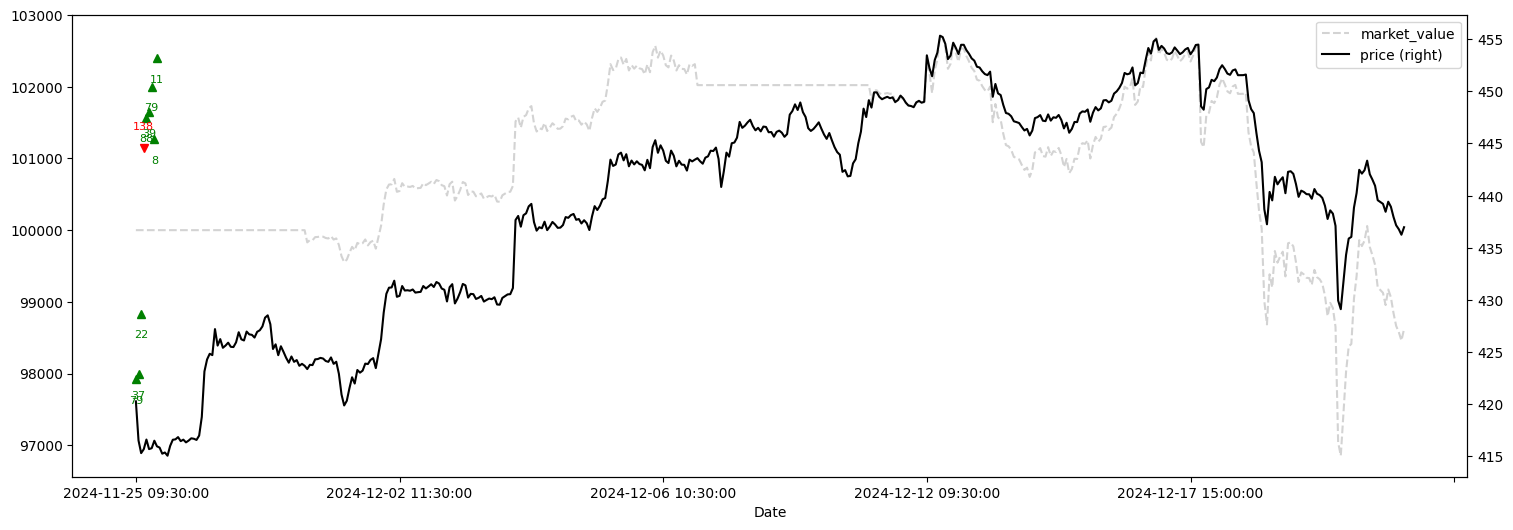

In [6]:
render_all(df)